# GradCAM Visualization for Emotional DAN


In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [2]:
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

set_session(tf.Session(config=config))

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import sys
print(sys.path)
sys.path.append('gradcam')
print(sys.path)

['', '/opt/conda/lib/python36.zip', '/opt/conda/lib/python3.6', '/opt/conda/lib/python3.6/lib-dynload', '/opt/conda/lib/python3.6/site-packages', '/opt/conda/lib/python3.6/site-packages/IPython/extensions', '/root/.ipython']
['', '/opt/conda/lib/python36.zip', '/opt/conda/lib/python3.6', '/opt/conda/lib/python3.6/lib-dynload', '/opt/conda/lib/python3.6/site-packages', '/opt/conda/lib/python3.6/site-packages/IPython/extensions', '/root/.ipython', 'gradcam']


### Load Emotional DAN

In [4]:
from models_old import emoDAN
import numpy as np

In [6]:
# EmoDAN directories

datasetDir = "/home/workspace/itautkute/emotionaldan/data/"
trainSet = np.load(datasetDir + "AffectnetVal_7.npz")
initLandmarks = trainSet['Landmark'][0].reshape((1,136))

danPath = '/home/workspace/itautkute/emotionaldan/Model2/Model2'
img_mean = trainSet['ImgMean']
img_std = trainSet['ImgStd']


In [7]:
validationSet = np.load(datasetDir + "Test_CK_224_7.npz")

Xvalid = validationSet['Image']
Yvalid = validationSet['Landmark']
Yvalid_em = validationSet['Emotion']

Xtrain = trainSet['Image']
Ytrain = trainSet['Landmark']
Ytrain_em = trainSet['Emotion']

In [8]:
# Load emodan

emodan = emoDAN(initLandmarks, 50)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



### Inference and visualisation

In [9]:
from grad_cam import visualize

INFO:tensorflow:Restoring parameters from /home/workspace/itautkute/emotionaldan/Model2/Model2
Predicted emotion: Happiness
True emotion Happiness
(224, 224)


/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


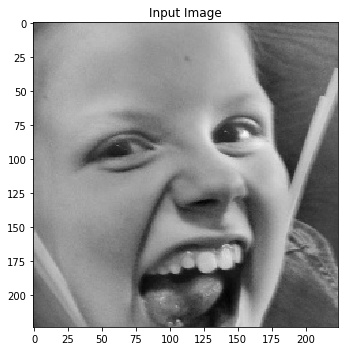

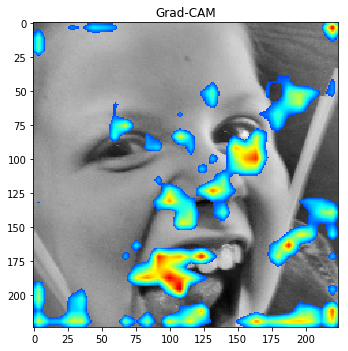

In [10]:
# Image for demo

idx = 109
batch_img = [Xtrain[idx]]
batch_label = [Ytrain_em[idx]]
visualize(batch_img, batch_label, danPath,  emodan, img_mask=0.2)

In [11]:
# Promising validation ids (CK+)

ids = [6, 7, 9, 107, 18]

# Promising training ids (affectnet validation)

train_ids = [16, 36, 46, 47, 49, 57,84, 89, 105, 107]
